In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
from collections import defaultdict
def fix_data(filepath,outpath):
    with open(filepath,"r") as f, open(outpath,"w") as o:
        for line in f.readlines():
            parts = line.split(",")
            if len(parts) == 4:
                o.write(line)
                

def read_data(filepath):
    df = pd.read_csv(filepath,names = ['date','time','temp','humid'])
    df['datetime'] = pd.to_datetime(df['date']+" "+df['time'],format="%Y-%m-%d %H:%M:%S")
    df.set_index('datetime',inplace=True)
    df = df[df['temp'] > 20]
    return df.loc['2019-12-01 22:00:00':].copy()

In [97]:
fix_data("../data/log_sealed.csv","../data/log_sealed_fixed.csv")
d1 = read_data("../data/log_open.csv")
d2 = read_data("../data/log_holes.csv")
d3 = read_data("../data/log_sealed_fixed.csv")

In [98]:
import seaborn as sns
import matplotlib.dates as mdates
sns.set(rc={'figure.figsize':(15, 5)})

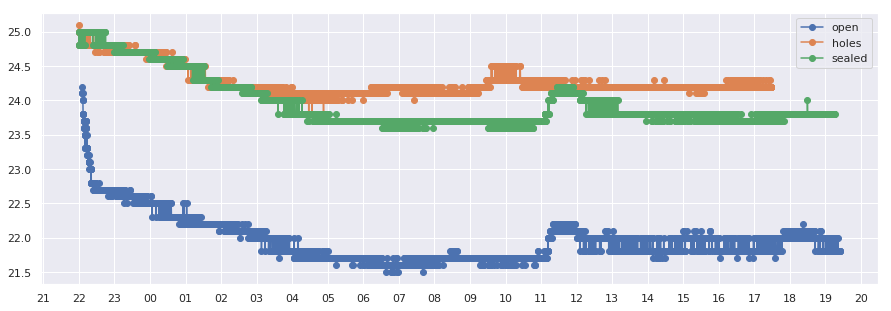

In [101]:
fig, ax = plt.subplots()
ax.plot(d1['temp'], marker='o', linestyle='-',label="open")
ax.plot(d2['temp'], marker='o', linestyle='-',label="holes")
ax.plot(d3['temp'], marker='o', linestyle='-',label="sealed")

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.legend(loc='upper right');